Title: Analyse en composantes principales avec Python
Author: Antoine
Date: '2021-04-13'
Slug: acp-python
Category: Python
Tags: Python, Machine Learning, Statistiques, Data Science  
Cover: 
Summary: Présentation et exemples d'utilisation de l'ACP en statistiques et data science.

# Analyse en composantes principales avec Python

Dans cet article, nous allons essayer de comprendre intuitivement comment fonctionne l'analyse en composantes principales. Nous présenterons ensuite à quoi celle-ci peut servir en prenant les exemples d'une analyse exploratoire des données et d'une problématique de réduction de dimension. 

## Explication introductive

L'analyse en composantes principales est une méthode consistant à transformer des variables corrélées entre elles en nouvelles variables. Chacune de ces nouvelles variables est le résultat d'une combinaison linéaire des anciennes variables. 

*Une combinaison linéaire de 3 variables $V_1$, $V_2$ et $V_3$ s'écrit $\alpha_1.V_1 + \alpha_2.V_2 + \alpha_3.V_3$ où les $\alpha_i$ sont des coefficients réels*

Ces nouvelles variables sont appelées __composantes principales__ et sont, par contruction, décorrélées les unes des autres.  

Autrement dit, l'ACP projette vos données dans un nouvel espace. La première composante principale est construite de manière à capter la plus grande variance possible de vos données, la seconde la part la plus importante de la variance possible __restant à expliquer__, et ainsi de suite.  

Une illustration brillante de ce processus est proposée par [Allison Horst](https://www.allisonhorst.com/). Elle [représente](https://twitter.com/allison_horst/status/1288904459490213888) un jeu de données à deux dimensions avec des crevettes et l'analyse en composantes principales comme les passages d'un requin-baleine affamé :  

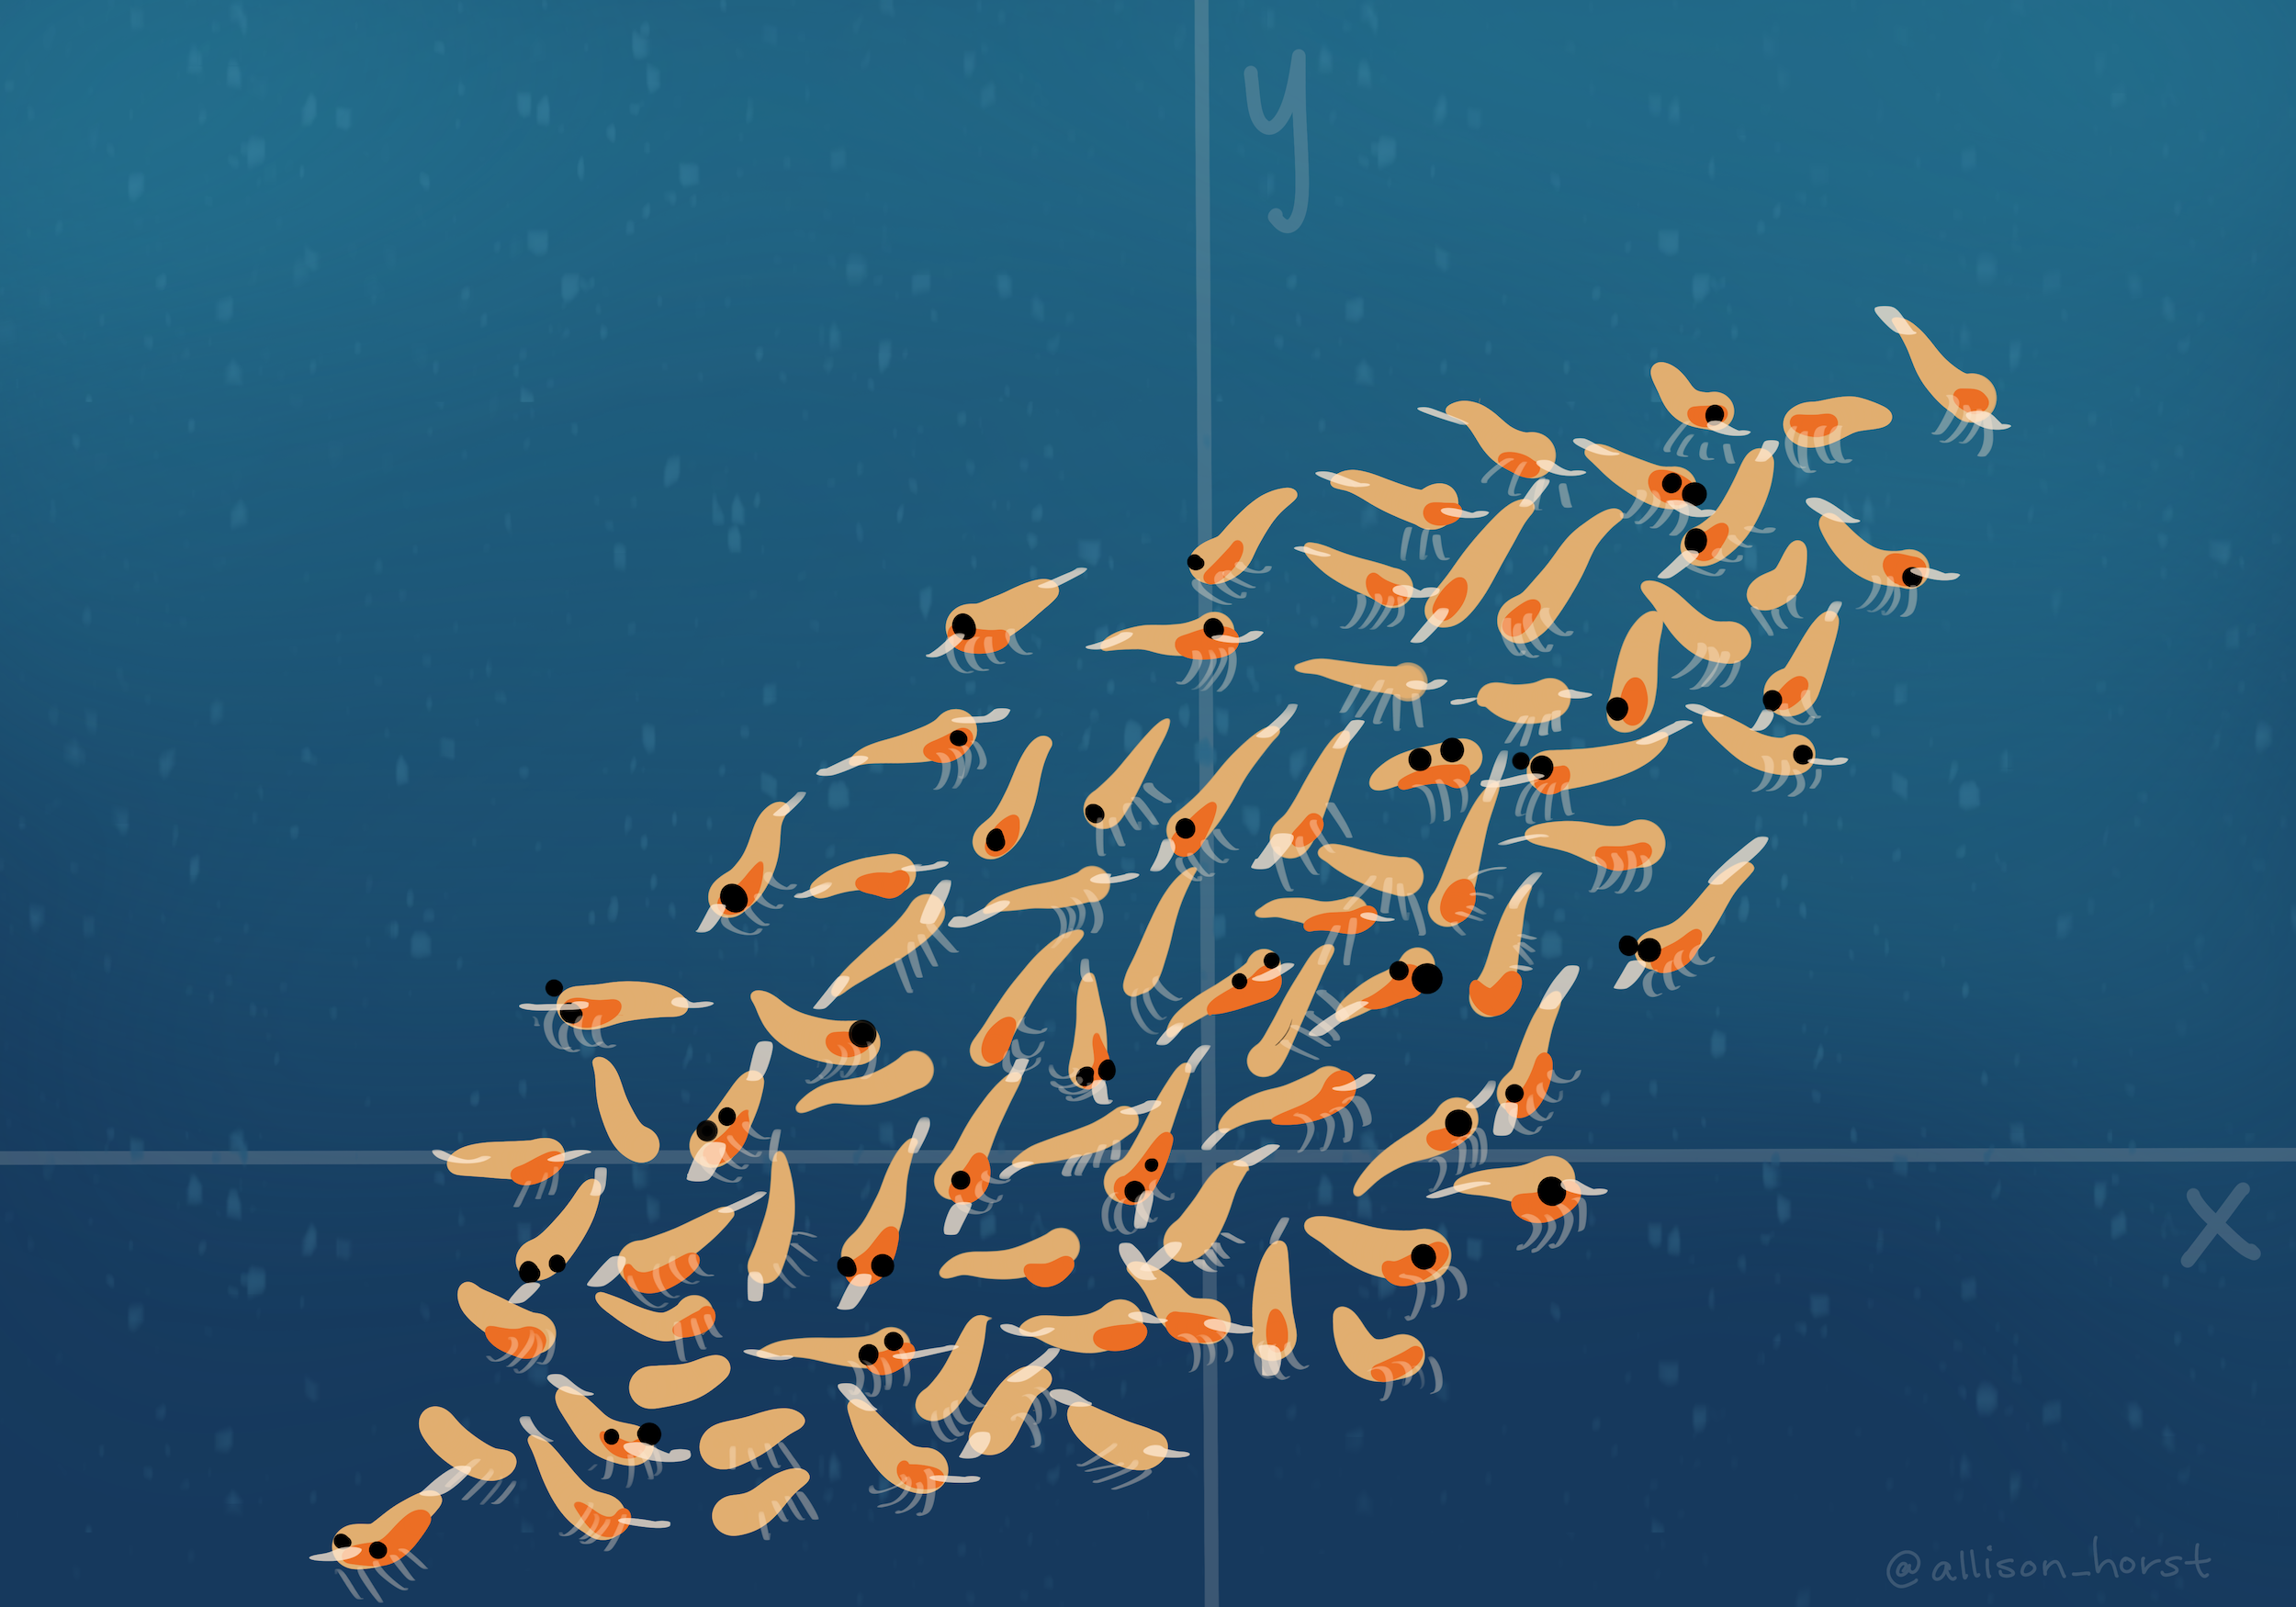

In [1]:
from IPython.display import Image
Image(filename='images/ACP/krill.png',width=300, height=200)

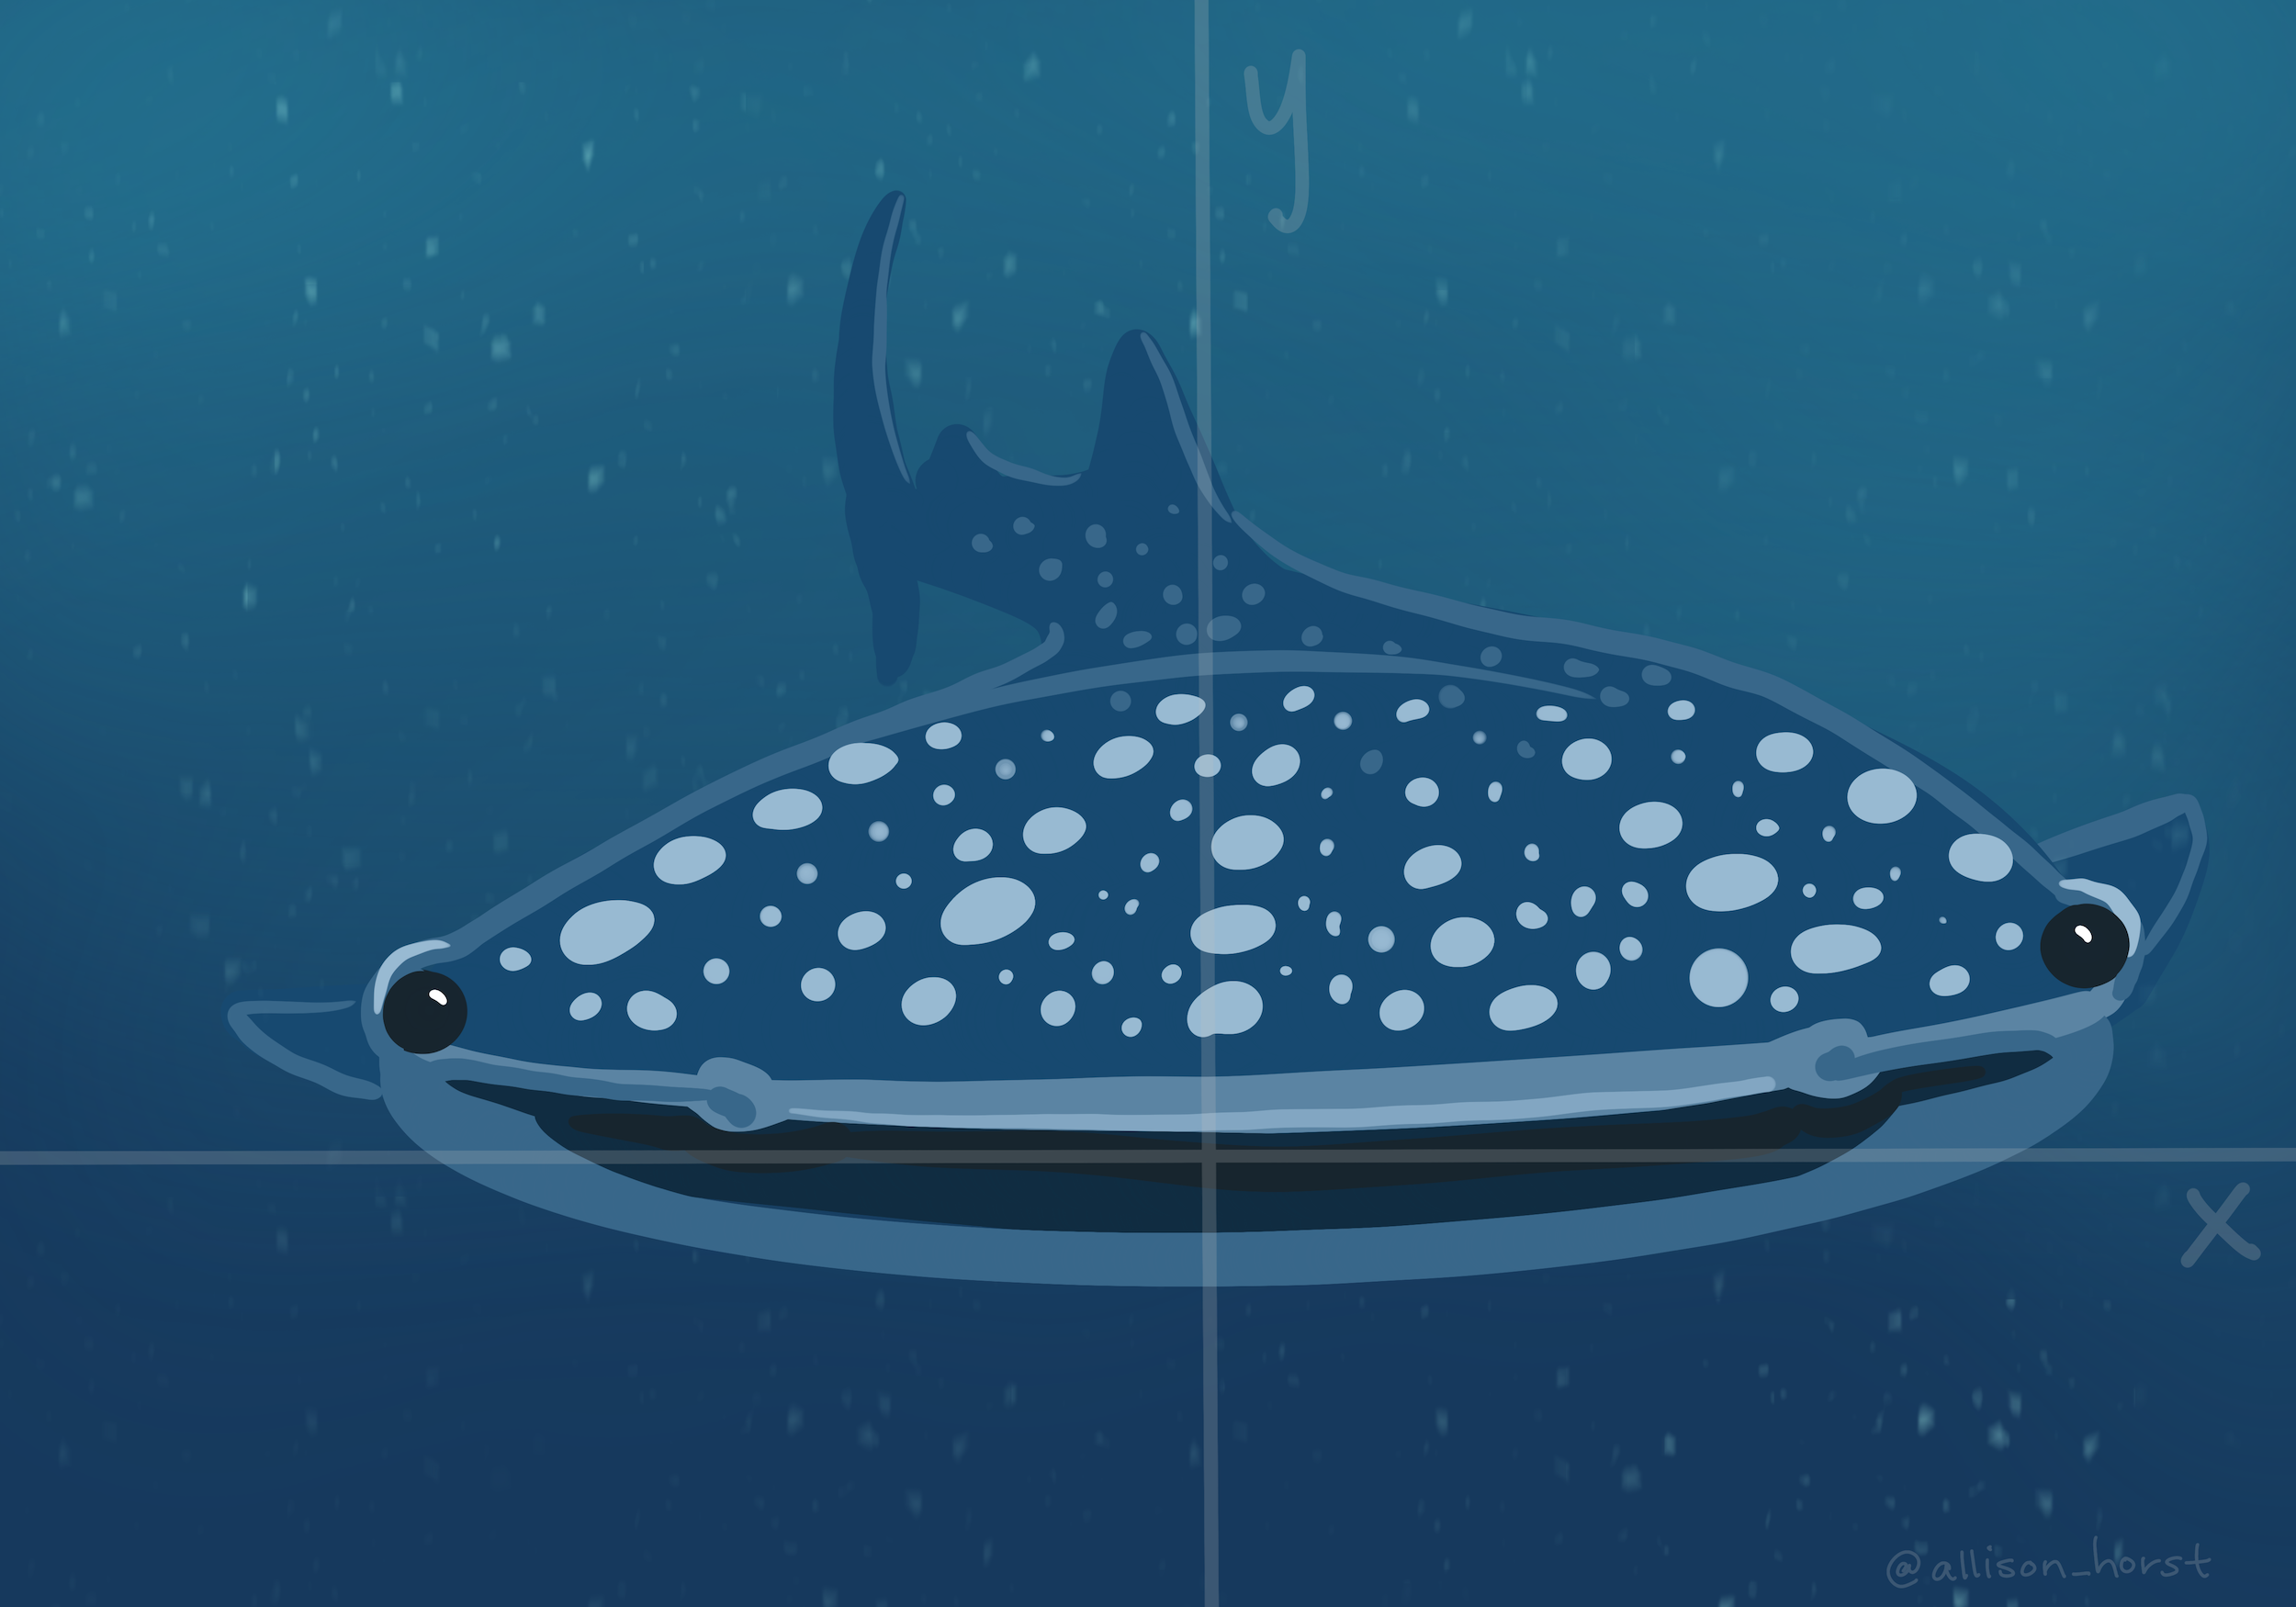

In [2]:
Image(filename='images/ACP/whaleshark.png',width=300, height=200)

La problématique du requin-baleine est en effet la même que celle de la création d'une première composante principale : quel axe choisir pour avaler un maximum de crevettes dès le premier passage? L'axe choisi va ressembler à celui-ci :  

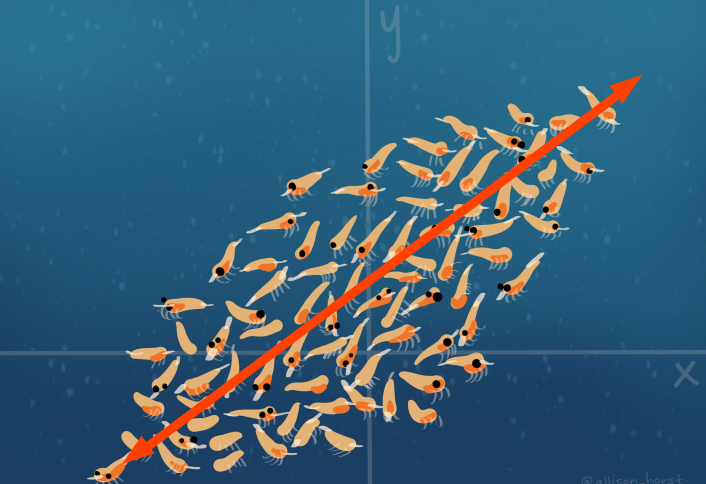

In [3]:
Image(filename='images/ACP/krill_axe.png',width=300, height=200)

Il s'agit pour le requin de choisir la droite de sorte qu'il y ait un maximum de crevettes sur son parcours ce qui revient à ce que les crevettes soient le plus proche possible de cette droite. Mathématiquement, la première composante principale est la combinaison linéaire des deux axes $x$ et $y$ qui maximise l'inertie projetée ce qui revient à minimiser les écarts entre les points et cette droite.

Dans cet exemple, la seconde composante principale sera l'axe perpendiculaire à ce premier axe.

Si les points étaient parfaitement alignés sur une ligne, l'ensemble de la variance serait expliqué par la première composante et on serait parvenus à réduire le nombre de dimensions de notre problème sans perte d'information.

## Mise en oeuvre d'une ACP
D'accord, on a projeté notre jeu de données dans un nouvel espace avec des nouvelles "variables" décrites comme combinaisons linéaires des précédentes telles que la première explique la plus grande partie de la variance possible, la seconde la plus grande partie de la variance restant à expliquer, etc... Mais ça nous sert à quoi?   

### Analyse exploratoire de nos données  
La caractéristique des composantes principales par rapport au jeu de données non transformé est que les premières composantes principales ont un fort pouvoir discriminant, puisqu'elles expliquent une grande partie de la variance totale du jeu de données. Ainsi, représenter notre jeu de données par rapport aux deux premiers axes de l'ACP peut permettre de vérifier que ces données permettent bien de distinguer différentes classes.  

Prenons comme exemple la base de données `wine` que l'on peut charger directement depuis le module `sklearn`. Cette base de données contient des résultats d'analyses chimiques de 178 vins de 3 différents producteurs. Ces résultats sont synthétisés par 13 mesures différentes que l'on retrouve dans les données. Pour voir si ces mesures permettent ou non de distinguer les vins des trois producteurs, nous allons commencer par représenter les vins sur l'espace des deux premières composantes principales. Pour cela, on importe les données et on les centre-réduit avant d'appliquer notre ACP avec la fonction `sklearn.decomposition.PCA`. On paramètre celle-ci pour qu'elle nous renvoie seulement les deux premières composantes :  

In [4]:
import numpy as np
# Import fonction ACP
from sklearn.decomposition import PCA

# Import données
from sklearn.datasets import load_wine

values, target = load_wine(return_X_y=True)
target_names = load_wine().target_names
feature_names = load_wine().feature_names
# on standardise nos données : 
from sklearn.preprocessing import StandardScaler
values_cr = StandardScaler().fit_transform(values)

# On paramètre notre PCA pour garder les deux premières composantes
pca=PCA(2)
pca_wine = pca.fit_transform(values_cr)

# en sortie : le même nombre de lignes que les données en entrées
# et le nombre de variables correspondant au nombre de composantes
# conservées
pca_wine.shape

(178, 2)

En sortie, nous obtenons les vecteurs des deux premières composantes dans l'objet `pca_wine`. Notons que nous aurions pu paramétrer la fonction `PCA` de manière à ce qu'elle nous renvoie le nombre de composantes nécessaire à expliquer `X`% de la variance, comme nous le ferons par la suite. Depuis l'objet `pca`, on peut voir le vecteur de la variance expliquée par chaque composante avec `pca.explained_variance_ratio_` et donc la variance totale expliquée par nos deux composantes en sommant les éléments de ce vecteur :  

In [5]:
pca.explained_variance_ratio_.sum()

0.554063383569353

On explique donc 55 % de la variance totale de nos données avec 2 composantes, alors que celle-ci contient 13 variables. Voyons si cela suffit à discriminer nos 3 producteurs visuellement :  

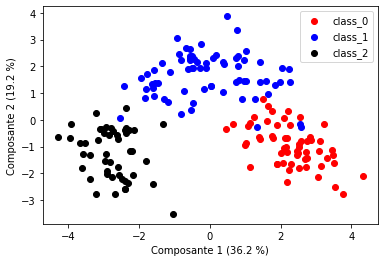

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# On fait le plot
color = ["red", "blue", "black"]
for i in range(3):
    plt.scatter(pca_wine[target == i, 0], pca_wine[target == i, 1],
            c=color[i], label = target_names[i])
plt.xlabel('Composante 1 (' + str(round(pca.explained_variance_ratio_[0] * 100, 1)) + ' %)')
plt.ylabel('Composante 2 (' + str(round(pca.explained_variance_ratio_[1] * 100, 1)) + ' %)')
plt.legend()
plt.show()

On constate ici que les 3 producteurs sont bien répartis dans des zones distinctes du plan et ce résultat semble montrer que chacun produit des types de vin caractéristiques.

On peut se convaincre que l'ACP a bien joué son rôle en produisant le même type de schéma avec deux autres variables originales du jeu de données (sans transformation linéaire), disons le degré d'alcool et l'intensité de la couleur. ON s'attend bien sûr à ce que les classes soient moins discriminées qu'avec les deux premières composantes principales :  

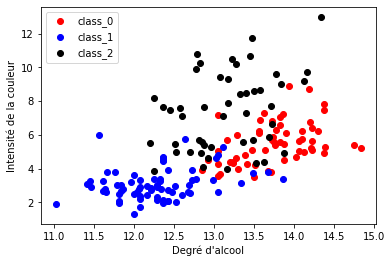

In [7]:
color = ["red", "blue", "black"]
for i in range(3):
    plt.scatter(values[target == i, np.array(feature_names) == "alcohol"], 
                values[target == i, np.array(feature_names) == "color_intensity"],
            c=color[i], label = target_names[i])
plt.xlabel("Degré d'alcool")
plt.ylabel("Intensité de la couleur")
plt.legend()
plt.show()

Ces variables permettent de distinguer des tendances, comme le fait que le producteur 1 produit des vins plutôt moins alcoolisés et dont la couleur est peu intense alors que le producteur 0 produit des vins plus alcoolisés. Mais ces variables seules ne permettent pas de partitionner nos classes aussi clairement qu'avec les deux premières composantes de notre ACP.   

L'ACP ne permet certes pas au premier coup d'oeil de proposer une interprétation des résultats, mais il est néanmoins possible d'étudier comment chaque variable contribue aux composantes avec l'instruction `pca.components_` :  

In [8]:
import pandas as pd
pd.DataFrame({"Noms des variables" : feature_names, "Composante 1" : pca.components_[0], "Composante 2" : pca.components_[1]})

Noms des variables  Composante 1  Composante 2
0                        alcohol      0.144329     -0.483652
1                     malic_acid     -0.245188     -0.224931
2                            ash     -0.002051     -0.316069
3              alcalinity_of_ash     -0.239320      0.010591
4                      magnesium      0.141992     -0.299634
5                  total_phenols      0.394661     -0.065040
6                     flavanoids      0.422934      0.003360
7           nonflavanoid_phenols     -0.298533     -0.028779
8                proanthocyanins      0.313429     -0.039302
9                color_intensity     -0.088617     -0.529996
10                           hue      0.296715      0.279235
11  od280/od315_of_diluted_wines      0.376167      0.164496
12                       proline      0.286752     -0.364903

Ce tableau représente les coefficients de la combinaison linéaire des variables pour chaque composante. Il nous permet par exemple de constater que l'intensité de la couleur et l'alcool jouent fortement et négativement sur la seconde composante. Cela correspond à ce que l'on observait dans les deux graphiques précédents puisque les vins des producteurs 0 et 2 ont des valeurs négatives sur l'axe de la seconde composante (1er graphique) et ce sont bien ceux dont le taux en alcool et l'intensité de la couleur sont les plus importants (2e graphique)

### Utilisation de l'ACP pour la réduction de dimensions  
La propriété de l'ACP de capter une partie importante de la variance des données à partir de moins de variables est particulièrement intéressante dans le domaine du Machine Learning pour être capable de fournir des prédictions avec des modèles plus légers (car utilisant moins de variables) et des résultats au moins aussi performants.  
Pour notre exemple, même si la réduction de dimensions n'est pas un enjeu fondamental vu le faible nombre de variables, nous pouvons tester si nous parvenons à faire un modèle de prédiction de l'origine du vin (producteur 0, 1 ou 2) en réduisant le nombre de dimensions.  
Tout d'abord, commençons par déterminer ce nombre de dimensions. Le graphique suivant nous donne l'évolution de la variance expliquée en fonction du nombre de composantes :   

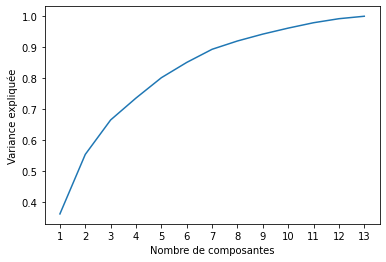

In [9]:
pca_graph = PCA().fit(values_cr)
plt.plot(np.cumsum(pca_graph.explained_variance_ratio_),)
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée')
plt.xticks(np.arange(len(pca_graph.explained_variance_ratio_)), np.arange(1, len(pca_graph.explained_variance_ratio_)+1))
plt.show()

L'ACP permettrait d'expliquer plus de 70% de la variance totale dès 4 composantes. Pour voir si cela est suffisant pour entraîner un modèle de prédiction, on peut comparer les performances d'un arbre de classification sur les données transformées après PCA et sur les données brutes. On utilise une méthode de validation croisée pour estimer les performances du modèle qui consiste à partitionner les données en 5 groupes et à entraîner les données sur 4 groupes et les tester sur celui restant. On fait cela 5 fois pour parcourir le champ des possibles et on évalue la précision globale du modèle en faisant la moyenne de ces 5 résultats. Cette méthode doit permettre d'estimer la qualité du modèle sur des données sur lesquelles il n'a pas été entraîné et de ne pas prendre en compte le surapprentissage dans son évaluation. Le tableau suivant donne les taux de précision obtenus pour chaque méthode, c'est à dire le nombre de vins correctement classifiés sur le nombre de vins total.

In [10]:
# Plutôt que de renseigner le nombre de composantes 
# on renseigne la valeur minimum de la variance 
# expliquée totale que l'on souhaite
pca=PCA(0.70) 
wine_pca = pca.fit_transform(values_cr)

# On entraîne notre modèle et on l'évalue avec une 
# méthode de validation croisée 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
mean_pca = cross_val_score(clf, wine_pca, target, cv=5).mean()
mean_all = cross_val_score(clf, values, target, cv=5).mean()

pd.DataFrame({"Précision moyenne après ACP" : [mean_pca], 
              "Précision moyenne sans ACP" : [mean_all], 
              "Nombre de composantes" : [wine_pca.shape[1]]})

Précision moyenne après ACP  Précision moyenne sans ACP  \
0                     0.933175                    0.887619   

   Nombre de composantes  
0                      4

On constate que l'ACP n'a pas seulement permis de réduire le nombre de dimensions de notre problème, elle nous offre aussi une précision globale du modèle supérieure. Cela n'est pas toujours le cas - puisque ça dépend de votre problématique, des variables explicatives dont vous disposez et du nombre de composantes que vous retenez - mais ici c'est dû au fait qu'elle permet de réduire le bruit associé aux données en ne conservant qu'une partie de l'information totale. Cela permet ainsi de prévenir les problèmes de surapprentissage, c'est à dire le fait que le modèle explique parfaitement les données d'entraînement mais se généralise mal à de nouvelles données. Ce sujet fera sans doute l'objet d'une note de blog dédiée prochainement!  

C'est tout pour aujourd'hui! Si vous voulez voir d'autres exemples d'utilisation de l'ACP, je vous conseille [cet article](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) qui aborde notamment le cas du traitement des images, pour lequel il est particulièrement intéressant de réduire le nombre de dimensions. Vous pouvez trouver le notebook avec l'ensemble du code ayant servi à générer cette note sur le [github de Statoscop](https://github.com/Statoscop/notebooks-blog).   